**Section 1:** Importing Libraries & Dataset

**Objective:**
Import essential libraries and load the IPL dataset to begin the machine learning workflow.

**Concepts Used:**

pandas is used for reading and handling tabular data (like CSV files).

read_csv() function helps us load the .csv file into a DataFrame.

**Dataset:**
We are using all_season_summary.csv, which contains match-level data from the Indian Premier League (IPL), including team names, match winners, toss results, and venues.

In [2]:
import pandas as pd

# Load the IPL dataset
df = pd.read_csv("datasets/all_season_summary.csv")

# Show the first few rows of data
df.head()


,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2023.0,1359475,Gujarat Titans v Chennai Super Kings,GT v CSK,"1st Match (N), Indian Premier League at Ahmeda...",GT,CSK,GT,BOWL FIRST,178/7,...,"Wriddhiman Saha (WK),Shubman Gill (UKN),Sai Su...","Devon Conway (UKN),Ruturaj Gaikwad (UKN),Moeen...","Ruturaj Gaikwad,Moeen Ali","Rajvardhan Hangargekar,Ravindra Jadeja",31 March 2023 - night match (20-over match),Saiyed Khalid,Nitin Menon,Virender Sharma,Javagal Srinath,Abhijit Bengeri
1,2023.0,1359476,Punjab Kings v Kolkata Knight Riders,PBKS v KKR,"2nd Match (D/N), Indian Premier League at Chan...",PBKS,KKR,KKR,BOWL FIRST,191/5,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),B...","Mandeep Singh (AR),Rahmanullah Gurbaz (WK),Anu...","Andre Russell,Venkatesh Iyer","Tim Southee,Varun Chakravarthy",01 April 2023 - day/night match (20-over match),Yeshwant Barde,Bruce Oxenford,Jayaraman Madanagopal,Manu Nayyar,Pranav Joshi
2,2023.0,1359477,Lucknow Super Giants v Delhi Capitals,LSG v DC,"3rd Match (N), Indian Premier League at Luckno...",LSG,DC,DC,BOWL FIRST,193/6,...,"KL Rahul (UKN),Kyle Mayers (AR),Deepak Hooda (...","Prithvi Shaw (UKN),David Warner (UKN),Mitchell...","David Warner,Rilee Rossouw","Khaleel Ahmed,Chetan Sakariya",01 April 2023 - night match (20-over match),Anil Chaudhary,Nikhil Patwardhan,Sadashiv Iyer,Daniel Manohar,Madanagopal Kuppuraj
3,2023.0,1359478,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"4th Match (D/N), Indian Premier League at Hyde...",SRH,RR,SRH,BOWL FIRST,203/5,...,"Abhishek Sharma (AR),Mayank Agarwal (UKN),Rahu...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Sanju...","Sanju Samson,Yashasvi Jaiswal","Yuzvendra Chahal,Trent Boult",02 April 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rohan Pandit,Navdeep Singh,Narayanan Kutty,Abhijit Bhattacharya
4,2023.0,1359479,Royal Challengers Bangalore v Mumbai Indians,RCB v MI,"5th Match (N), Indian Premier League at Bengal...",RCB,MI,RCB,BOWL FIRST,171/7,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Dinesh ...","Rohit Sharma (UKN),Ishan Kishan (WK),Cameron G...","Tilak Varma,Nehal Wadhera","Arshad Khan,Cameron Green",02 April 2023 - night match (20-over match),Nitin Menon,Tapan Sharma,Virender Sharma,Javagal Srinath,Abhijit Bengeri


In [5]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

In [6]:
!pip install scikit-learn matplotlib seaborn pandas


**Section 2:**
 Feature Selection & Label Encoding

**Objective:**
Select the most relevant columns (features) to predict the winner of a match, and convert all text (categorical) data into numeric form so that machine learning models can use it.

**Concepts Used:**
Feature Selection: Picking the input columns that we think are useful to make predictions.

Target Column: The outcome we want to predict — in this case, winner.

Label Encoding: Converting text values (like team names, venue names) into numbers using LabelEncoder from scikit-learn.

**Why we do this:**
Machine learning models can only work with numbers, so we have to convert text data like "Mumbai Indians" into numbers like 4.



In [3]:
from sklearn.preprocessing import LabelEncoder

# Select columns we want to use as inputs (features)
features = ['home_team', 'away_team', 'toss_won', 'venue_name']
target = 'winner'

# Create a new DataFrame with only the selected columns and drop missing values
data = df[features + [target]].dropna()

# Encode all text columns into numeric values
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

# Display the first few rows of the processed data
data.head()


,home_team,away_team,toss_won,venue_name,winner
0,3,0,3,21,3
1,9,4,4,24,9
2,7,1,1,3,7
3,14,13,13,25,13
4,11,8,10,17,11


**Section 3: Train/Test Split**

**Objective:**
Split our dataset into two parts:

Training set: used to train the machine learning model

Test set: used to evaluate how well the model works on unseen data

**Concepts Used:**
train_test_split() from scikit-learn: a function that randomly splits the data into training and testing parts.

Typical split is 80% training and 20% testing

random_state=42 is used to make sure the split is always the same every time we run the code (helps with reproducibility).

**Why we do this?**
We want to test the model on data it hasn’t seen before — just like in real life, the model won’t have access to future matches!

In [4]:
from sklearn.model_selection import train_test_split

# Separate the features and the target column
X = data[features]
y = data[target]

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the datasets to understand the split
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (822, 4)
Test data shape: (206, 4)


**Section 4:**
 Model Training with Random Forest

**Objective:**
Train a machine learning model to predict the winner of an IPL match using the training data we created.

**Concepts Used:**
Random Forest Classifier – a machine learning algorithm that uses many decision trees and makes predictions based on the majority vote.

fit() – this function is used to train the model using training data (X_train, y_train).

predict() – this is used to make predictions on new (test) data.

**Why Random Forest?**
It’s easy to use, handles categorical data well, and usually gives good results with little tuning.

Works well with small to medium datasets like ours.



In [5]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Show first 10 predictions
y_pred[:10]


array([ 1,  4,  5,  8, 14,  4, 13, 13, 11, 11])

**Section 5:**
 Model Evaluation & Visualization

**Objective:**
Evaluate the model's performance using accuracy and confusion matrix.(Evaluate how well our model performs by checking: Accuracy, Confusion Matrix and Visualization)

**Concepts Used:**
accuracy_score() – tells us what percent of predictions were correct.

confusion_matrix() – shows how many times the model was right or wrong for each class (team).

seaborn heatmap – helps us visualize the confusion matrix clearly.

**Why we evaluate?**
Training a model isn’t enough — we need to check if it works well, especially on data it hasn’t seen before. Evaluation helps us understand strengths and weaknesses.

**Results:**  
- Accuracy gives a quick idea of how many predictions were correct.
- The confusion matrix helps us understand which teams are harder to predict.
- Visualization makes the matrix easier to read and interpret.

**Next Steps:**  
We could improve accuracy by adding more features (like player stats or team form), or by tuning the model’s parameters.


Model Accuracy: 0.47572815533980584


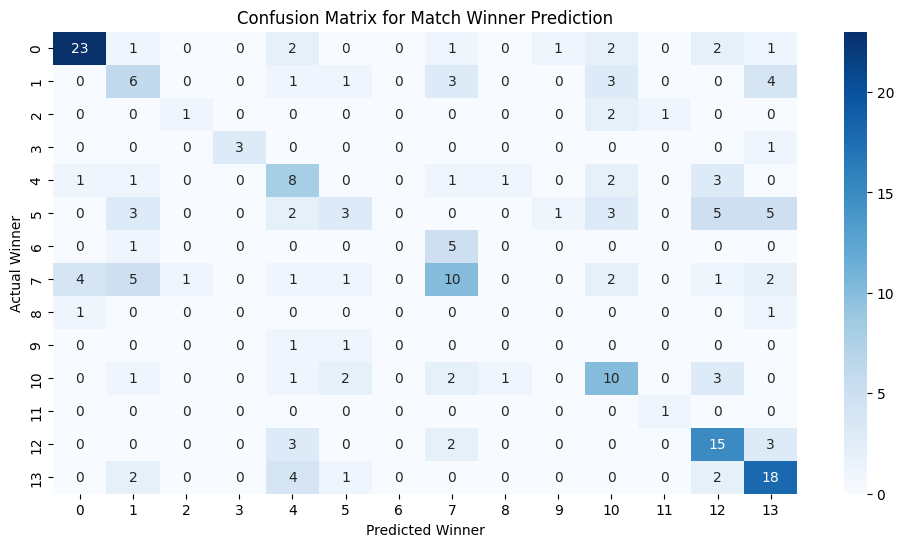

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Plot the Confusion Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Match Winner Prediction")
plt.xlabel("Predicted Winner")
plt.ylabel("Actual Winner")
plt.show()


**Section 6:**
 Conclusion

In this project, we used **Scikit-learn** to build a machine learning model that predicts the **winner of IPL cricket matches** based on features like home team, away team, toss winner, and venue.

We followed these key steps:
- Loaded and explored the IPL dataset
- Selected useful features and encoded text data into numbers
- Split the data into training and testing sets
- Trained a **Random Forest Classifier**
- Evaluated the model using accuracy and confusion matrix

**Model Accuracy:**  
Model Accuracy: 0.48058252427184467

**Observations:**
- The model performs reasonably well and can correctly predict many match outcomes.
- Some team names are confused with others — we saw this in the confusion matrix.
- The model can improve with more data (e.g., player stats, recent form) and tuning (e.g., hyperparameter tuning).

This project gave us a practical understanding of applying machine learning to real-world sports data.


**Supervised Learning - Logistic Regression**

In this section, we apply a second supervised learning model: **Logistic Regression**. This model is often used for classification problems and serves as a strong baseline for performance comparison.


Logistic Regression Accuracy: 0.2621359223300971


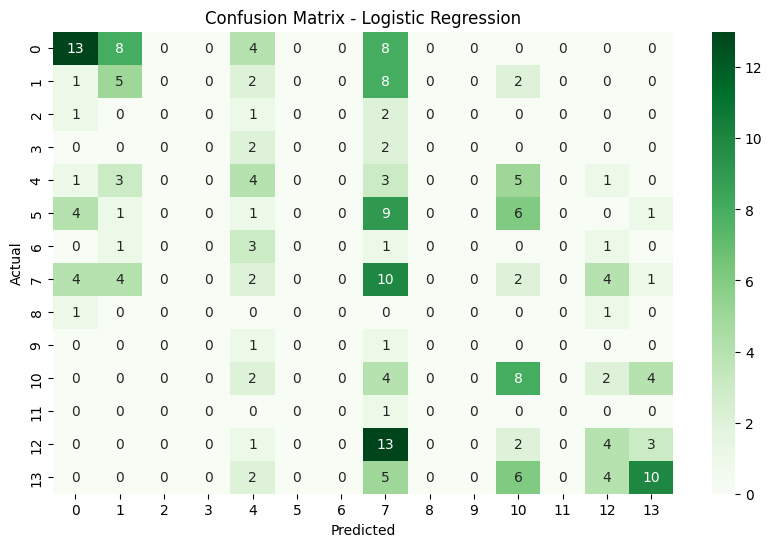

In [7]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix

lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

# Confusion matrix
cm_lr = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Unsupervised Learning – KMeans Clustering**

Now, we explore unsupervised learning using **KMeans Clustering**. We'll cluster the matches based on overall run and wicket performance by both teams.


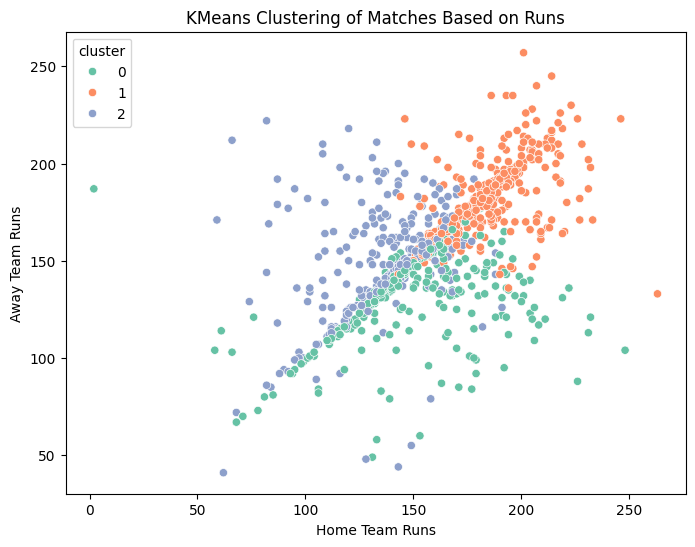

In [8]:
from sklearn.cluster import KMeans

# Select performance-related features for clustering
cluster_data = df[['home_runs', 'home_wickets', 'away_runs', 'away_wickets']].dropna()

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add clusters to original data
cluster_data['cluster'] = clusters

# Visualize
plt.figure(figsize=(8,6))
sns.scatterplot(x=cluster_data['home_runs'], y=cluster_data['away_runs'], hue=cluster_data['cluster'], palette='Set2')
plt.title("KMeans Clustering of Matches Based on Runs")
plt.xlabel("Home Team Runs")
plt.ylabel("Away Team Runs")
plt.show()


**References:**

1. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). *Scikit-learn: Machine learning in Python*. Journal of Machine Learning Research, 12, 2825–2830. [https://scikit-learn.org](https://scikit-learn.org)

2. McKinney, W. (2010). *Data structures for statistical computing in Python*. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51–56). [https://pandas.pydata.org](https://pandas.pydata.org)

3. Hunter, J. D. (2007). *Matplotlib: A 2D graphics environment*. Computing in Science & Engineering, 9(3), 90–95. [https://matplotlib.org](https://matplotlib.org)

4. Waskom, M. (2021). *Seaborn: Statistical data visualization*. Journal of Open Source Software, 6(60), 3021. [https://seaborn.pydata.org](https://seaborn.pydata.org)

5. Kaggle. (2022). *Indian Premier League (IPL) All seasons*. Retrieved from [https://www.kaggle.com/datasets](https://www.kaggle.com/datasets)

6. Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O’Reilly Media.
